<a href="https://colab.research.google.com/github/Young-Dong/nlp/blob/main/nlp100_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第6章: 機械学習

本章では，Fabio Gasparetti氏が公開している[News Aggregator Data Set](https://archive.ics.uci.edu/ml/datasets/News+Aggregator)を用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip

--2021-12-09 12:43:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  33.2MB/s    in 0.8s    

2021-12-09 12:43:27 (33.2 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]



50. データの入手・整形

News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

1.ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．

2.情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．

3.抽出された事例をランダムに並び替える．

4.抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [ ]:
import zipfile
import pandas as pd

with zipfile.ZipFile('NewsAggregatorDataset.zip') as f:
    f.extractall('data')

with open('data/readme.txt') as f:
  while True:
    s_line = f.readline()
    print(s_line)
    if not s_line:
      break

SUMMARY: Dataset of references (urls) to news web pages



DESCRIPTION: Dataset of references to news web pages collected from an online aggregator in the period from March 10 to August 10 of 2014. The resources are grouped into clusters that represent pages discussing the same news story. The dataset includes also references to web pages that point (has a link to) one of the news page in the collection.



TAGS: web pages, news, aggregator, classification, clustering



LICENSE: Public domain - Due to restrictions on content and use of the news sources, the corpus is limited to web references (urls) to web pages and does not include any text content. The references have been retrieved from the news aggregator through traditional web browsers. 



FILE ENCODING: UTF-8



FORMAT: Tab delimited CSV files. 



DATA SHAPE AND STATS: 422937 news pages and divided up into:



152746 	news of business category

108465 	news of science and technology category

115920 	news of business category

In [ ]:
df = pd.read_csv('data/newsCorpora.csv', sep='\t'
   ,header=None, names=['ID','TITLE','URL','PUBLISHER','CATEGORY','STORY','HOSTNAME','TIMESTAMP'])
target = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']
df_target = df[df['PUBLISHER'].isin(target)]
print(df.shape,'\n', df_target.shape)
df_target.head(2)

(422419, 8) 
 (13340, 8)


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
12,13,Europe reaches crunch point on banking union,http://in.reuters.com/article/2014/03/10/eu-ba...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501755
13,14,ECB FOCUS-Stronger euro drowns out ECB's messa...,http://in.reuters.com/article/2014/03/10/ecb-p...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501948


In [ ]:
# train_test_split can do this..
from sklearn.utils import shuffle
df_target = shuffle(df_target).reset_index().drop(columns='index')
df_target.head(2)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,387241,Time Warner Shareholders Call Murdoch Bid Hard...,http://www.businessweek.com/news/2014-07-16/ti...,Businessweek,b,dMElbuCt8WnYaeM7R5FNMSjx8irwM,www.businessweek.com,1405613266717
1,88971,Neil Patrick Harris On Taking Over For David L...,http://www.huffingtonpost.com/2014/04/07/neil-...,Huffington Post,e,dynU_WiAg43028M4GORaVNmgsOgLM,www.huffingtonpost.com,1396935110392


In [ ]:
from sklearn.model_selection import train_test_split
train, non_train = train_test_split(df_target[['TITLE','CATEGORY']], test_size=0.2, random_state=42)
valid, test = train_test_split(non_train, test_size=0.5, random_state=42)
train.to_csv('train.txt', sep='\t')
valid.to_csv('valid.txt', sep='\t')
test.to_csv('test.txt', sep='\t')
print(train.shape, '\n', valid.shape, '\n', test.shape)

(10672, 2) 
 (1334, 2) 
 (1334, 2)


In [ ]:
train['CATEGORY'].value_counts()

b    4546
e    4178
t    1209
m     739
Name: CATEGORY, dtype: int64

In [ ]:
test['CATEGORY'].value_counts()

b    566
e    531
t    154
m     83
Name: CATEGORY, dtype: int64

51. 特徴量抽出

学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_target['TITLE'])
vectorizer.get_feature_names_out()

array(['00', '05', '07', ..., 'œlousyâ', 'œpiece', 'œwaist'], dtype=object)

In [ ]:
X.shape

(13340, 14039)

In [ ]:
y_train, y_non_train, X_train, X_non_train = train_test_split(df_target['CATEGORY'], X, test_size=0.2, random_state=42)
y_valid, y_test, X_valid, X_test = train_test_split(y_non_train, X_non_train, test_size=0.5, random_state=42)
pd.DataFrame(X_train).to_csv('train.feature.txt', sep='\t')
pd.DataFrame(X_valid).to_csv('valid.feature.txt', sep='\t')
pd.DataFrame(X_test).to_csv('test.feature.txt', sep='\t')
print(X_train.shape, '\n', X_valid.shape, '\n', X_test.shape)

(10672, 14039) 
 (1334, 14039) 
 (1334, 14039)


52. 学習

51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

53. 予測

52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

54. 正解率の計測

52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('train accuracy = ', accuracy_score(y_true=y_train, y_pred=y_train_pred))
print('test accuracy = ', accuracy_score(y_true=y_test, y_pred=y_test_pred))

train accuracy =  0.9301911544227887
test accuracy =  0.8545727136431784


In [ ]:
lr.score(X_train, y_train)

0.9452773613193404

55. 混同行列の作成

52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [ ]:
print('train:\n',confusion_matrix(y_train, y_train_pred))
print('test:\n',confusion_matrix(y_test, y_test_pred))

train:
 [[4457   51    3   35]
 [  21 4153    0    4]
 [  80  127  528    4]
 [ 152  105    2  950]]
test:
 [[534  20   2  10]
 [ 10 520   0   1]
 [ 17  25  39   2]
 [ 42  33   1  78]]


56. 適合率，再現率，F1スコアの計測

52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [ ]:
precision_micro = precision_score(y_test, y_test_pred, average='micro')
precision_macro = precision_score(y_test, y_test_pred, average='macro')
recall_micro = recall_score(y_test, y_test_pred, average='micro')
recall_macro = recall_score(y_test, y_test_pred, average='macro')
f1_micro = f1_score(y_test, y_test_pred, average='micro')
f1_macro = f1_score(y_test, y_test_pred, average='macro')
print('precision_micro', precision_micro, '\nprecision_macro',precision_macro,
      '\nrecall_micro', recall_micro, '\nrecall_macro', recall_macro,
      '\nf1_micro', f1_micro, '\nf1_macro', f1_macro)

precision_micro 0.8778110944527736 
precision_macro 0.8852129106022683 
recall_micro 0.8778110944527736 
recall_macro 0.7247800728017938 
f1_micro 0.8778110944527736 
f1_macro 0.7738763097077297


57. 特徴量の重みの確認

52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [ ]:
lr_coef = pd.DataFrame(lr.coef_, columns=vectorizer.get_feature_names_out(), index=lr.classes_).T
for i in lr_coef.columns:
  print(lr_coef[[i]].nlargest(10, i))
  print(lr_coef[[i]].nsmallest(10, i))

                b
fed      3.541107
china    3.410867
bank     3.286999
ecb      3.092041
stocks   2.988420
euro     2.732873
oil      2.730010
update   2.705977
ukraine  2.528271
profit   2.503273
               b
and    -2.630520
the    -2.080454
her    -1.971904
ebola  -1.959920
she    -1.861273
google -1.780204
study  -1.763494
star   -1.745120
apple  -1.720509
video  -1.639635
                   e
kardashian  3.277306
chris       2.820279
star        2.791977
miley       2.487801
she         2.469533
cyrus       2.443998
her         2.434463
kim         2.412986
paul        2.317321
film        2.253812
                 e
update   -3.396209
us       -3.226309
google   -2.914981
china    -2.422805
facebook -2.379969
ceo      -2.173377
says     -2.150249
gm       -2.134121
apple    -2.118465
billion  -2.078436
                   m
ebola       4.755472
cancer      4.107791
study       3.868117
fda         3.543722
drug        3.512737
mers        3.159343
health      2.740370
cases  

58. 正則化パラメータの変更

ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [ ]:
C = [10**i for i in range(-7,2)]
df_score = pd.DataFrame()
for c in C:
  lr = LogisticRegression(random_state=0, C=c)
  lr.fit(X_train, y_train)
  tmp = pd.DataFrame([c, lr.score(X_train, y_train), lr.score(X_valid, y_valid), lr.score(X_test, y_test)]).T
  df_score = pd.concat([df_score,tmp])
df_score.columns = ['C','train','valid','test']

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


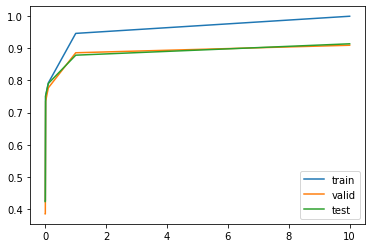

In [ ]:
import matplotlib.pyplot as plt

for i in ['train', 'valid', 'test']:
  plt.plot(df_score['C'], df_score[i])

plt.legend(['train', 'valid', 'test'])
plt.show()

In [ ]:
df_score

,C,train,valid,test
0,1.000000e-07,0.425975,0.386057,0.424288
0,1.000000e-06,0.425975,0.386057,0.424288
0,1.000000e-05,0.425975,0.386057,0.424288
0,1.000000e-04,0.425975,0.386057,0.424288
0,1.000000e-03,0.428130,0.387556,0.425037
0,1.000000e-02,0.751312,0.734633,0.751124
0,1.000000e-01,0.791885,0.776612,0.790105
0,1.000000e+00,0.945277,0.885307,0.877811
0,1.000000e+01,0.998407,0.908546,0.913043


59. ハイパーパラメータの探索

学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [ ]:
!pip install optuna
!pip install lightgbm==3.3.1

     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 209 kB 35.8 MB/s 
     |████████████████████████████████| 80 kB 8.8 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 112 kB 59.7 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 149 kB 54.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=fbb91f5a31de4b89371731e7ac9d1975dbd28643003eccb7c83fceefa6bcaa59
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 2.0 MB 5.2 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
# high parameter for logistical regression
import optuna

def objective(trial):

    C = trial.suggest_loguniform("C", 1e-7, 10.0)
    solver = trial.suggest_categorical("solver", ("lbfgs", "saga"))

    clf = LogisticRegression(C=C, solver=solver)
    clf.fit(X_train, y_train)
    val_accuracy = clf.score(X_test, y_test)

    return val_accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2021-12-09 12:44:01,346] A new study created in memory with name: no-name-145ee62a-c4d5-4d2f-85e6-db14beba8b36
[I 2021-12-09 12:44:04,261] Trial 0 finished with value: 0.424287856071964 and parameters: {'C': 2.7282757687721904e-05, 'solver': 'saga'}. Best is trial 0 with value: 0.424287856071964.
[I 2021-12-09 12:44:05,189] Trial 1 finished with value: 0.424287856071964 and parameters: {'C': 5.181521222762027e-07, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.424287856071964.
[I 2021-12-09 12:44:08,046] Trial 2 finished with value: 0.8628185907046477 and parameters: {'C': 0.6967438293117091, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.8628185907046477.
[I 2021-12-09 12:44:08,502] Trial 3 finished with value: 0.6394302848575713 and parameters: {'C': 0.00442971471328831, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.8628185907046477.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STO

In [ ]:
import lightgbm as lgb

df_X_train = pd.DataFrame(X_train.toarray())
for col in df_X_train.columns:
  df_X_train[col] = df_X_train[col].astype('float')

dtrain = lgb.Dataset(df_X_train, label=y_train)
dval = lgb.Dataset(pd.DataFrame(X_valid.toarray()), label=y_valid)

param = {'objective': 'multiclass', 'num_class': 4}

num_round = 10
bst = lgb.train(param, dtrain, num_round, valid_sets=[dval])


ValueError: ignored

In [ ]:
df_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10672 entries, 0 to 10671
Columns: 14039 entries, 0 to 14038
dtypes: float64(14039)
memory usage: 1.1 GB


In [ ]:
pd.DataFrame(X_train.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,13999,14000,14001,14002,14003,14004,14005,14006,14007,14008,14009,14010,14011,14012,14013,14014,14015,14016,14017,14018,14019,14020,14021,14022,14023,14024,14025,14026,14027,14028,14029,14030,14031,14032,14033,14034,14035,14036,14037,14038
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = pd.DataFrame(X_train.toarray())

In [ ]:
y_train.value_counts()

b    4548
e    4206
t    1221
m     697
Name: CATEGORY, dtype: int64

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('train accuracy = ', accuracy_score(y_true=y_train, y_pred=y_train_pred))
print('test accuracy = ', accuracy_score(y_true=y_test, y_pred=y_test_pred))

train accuracy =  0.9301911544227887
test accuracy =  0.8545727136431784


In [ ]:
import numpy as np
import optuna.integration.lightgbm as lgb

from lightgbm import early_stopping
from lightgbm import log_evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


dtrain = lgb.Dataset(pd.DataFrame(X_train.toarray()), label=y_train)
dval = lgb.Dataset(pd.DataFrame(X_valid.toarray()), label=y_valid)

params = {
    "objective": "multiclass",
    'num_class': 4,
    # "metric": "binary_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
}

model = lgb.train(
    params,
    dtrain,
    valid_sets=[ dval],
    # callbacks=[early_stopping(100), log_evaluation(100)],
)

prediction = np.rint(model.predict(X_valid, num_iteration=model.best_iteration))
accuracy = accuracy_score(val_y, prediction)

best_params = model.params
print("Best params:", best_params)
print("  Accuracy = {}".format(accuracy))
print("  Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))